In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Regression Kit

#Split for a 20% of data as Test Sample 
def train_test_split(x, y):
    if y.size != x.shape[0]:
        print('X size not same as Y Size')
    train_end_idx = int(np.floor(y.size * 0.8))
    return x[:train_end_idx] , x[train_end_idx:] , y[:train_end_idx] , y[train_end_idx :]
def terminals_train_test_split(x,y):
    if y.size != x.shape[0]:
        print('X size not same as Y Size')
    test_portion_half = np.ceil(y.size * 0.2) / 2
    test_1st_idx = int(np.ceil(test_portion_half))
    test_2nd_idx = int(-np.floor(test_portion_half))
    x_train = x[test_1st_idx:test_2nd_idx]
    x_test = np.append(x[:test_1st_idx],x[test_2nd_idx:], axis = 0)
    y_train = y[test_1st_idx:test_2nd_idx]
    y_test = np.append(y[:test_1st_idx],y[test_2nd_idx:])
    return  x_train , x_test , y_train , y_test

def standradization(data):
    means = data.mean(axis = 0)
    stds = data.std(axis = 0)
    return (data - means) / stds , means , stds

def hyp(theta, x):
    return x.dot(theta)
def sigmoid(x):
    return 1 /(1 + np.exp(-x))
def propability(y, x, theta):
    return sigmoid(hyp(theta, x)) ** y * (1 - sigmoid(hyp(theta, x))) ** (1 - y)
def g(theta, x):
    return np.round(propability(True, x, theta))


def gradient_direction(linear,theta, x, y):
    #errors
    if linear:
        grad = hyp(theta,x) - y
    else:
        grad = y - sigmoid(hyp(theta, x))
    #summation
    grad = (x.T).dot(grad)
    #gradient direction
    grad = grad / y.size
    return grad


def mean_square_error(theta, x, y):
    #errors
    mse = hyp(theta,x) - y
    #square errors
    mse = mse.T.dot(mse)
    #mean
    mse /= y.size
    return mse

def gradient_descent(theta, x, y, alpha, iter_num):
    theta = theta.copy()
    mean_square_errors = np.array([mean_square_error(theta, x, y)]) 
    for i in range(iter_num):
        theta = theta - alpha * gradient_direction(True,theta, x, y)
        mean_square_errors = np.append(mean_square_errors, mean_square_error(theta, x, y))
    return theta ,  mean_square_errors


def likelihood_estimation(theta, x, y):
    return np.prod(propability(y, x, theta))

def gradient_ascent(theta, x, y, alpha, iter_num):
    theta = theta.copy()
    likelihood_estimations = np.array([likelihood_estimation(theta, x, y)]) 
    for i in range(iter_num):
        theta = theta + alpha * gradient_direction(False,theta, x, y)
        likelihood_estimations = np.append(likelihood_estimations, likelihood_estimation(theta, x, y))
    return theta ,  likelihood_estimations

In [3]:
#Visualizing Output
def accuracy(linear, theta, x, y):
    if linear:
        print('Mean Square Error of theta on Test Sample:')
        print(mean_square_error(theta, x, y))
    else:
        print('Likelihood Estimation of theta on Test Sample:')
        print(likelihood_estimation(theta, x, y))
        print('Correct Predictions % of theta on Test Sample:')
        predictions = g(theta,x)
        correct_predictions = 0
        for i in range(y.size):
            if predictions[i] == y[i]:
                correct_predictions += 1
        print(str(correct_predictions / y.size * 100) + '%')         

def debugging_visualiztion(iterations_range,alpha,intial_theta, optimal_theta, evaluations):
    iterations = np.arange(iterations_range)
    plt.plot(iterations, evaluations[:iterations_range])
    plt.xlabel('no. of iterations')
    plt.ylabel('mean Squared error')
    plt.title('Alpha =' +  str(alpha))
    print('Alpha =', alpha)
    print('Intial Theta:', intial_theta, '==> Optimal_theta:', optimal_theta)
    print('Intial Evalution Value:', evaluations[0], '==> Final Evalution Value:', evaluations[-1])
    plt.show()
    print('Evalution Values of Gradient Iterations:')
    print(evaluations)
    return

def visualize_model(feature_name,feature_idx,features, mean, std, optimal_theta):
    start_x_idx = np.argmin(features[:,feature_idx])
    end_x_idx = np.argmax(features[:,feature_idx])
    
    start_x = features[start_x_idx,feature_idx]
    end_x = features[end_x_idx,feature_idx]
    
    start_y = hyp(optimal_theta, features[start_x_idx,:])
    end_y = hyp(optimal_theta, features[end_x_idx,:])
    
    plt.plot([start_x, end_x], [start_y, end_y])
    plt.scatter(features[:,feature_idx], y)
    plt.xlabel(feature_name)
    plt.ylabel('price')
    plt.title('Actual VS Prediction')
    plt.show()
    return

In [4]:
#Load Data
house_data = pd.read_csv("house_data.csv", usecols = ['price','grade', 'bathrooms', 'lat', 'sqft_living', 'view'])
heart_data = pd.read_csv("heart.csv", usecols = ['target', 'trestbps', 'chol', 'thalach', 'oldpeak'])

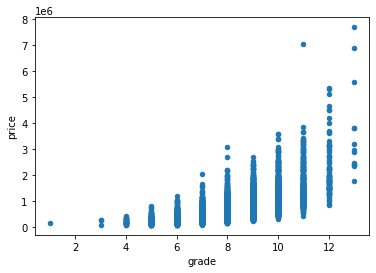

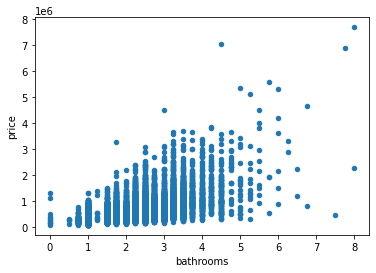

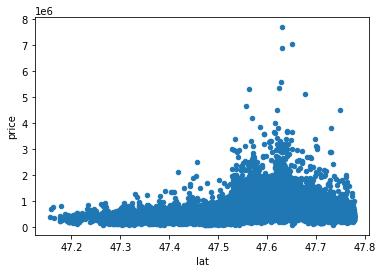

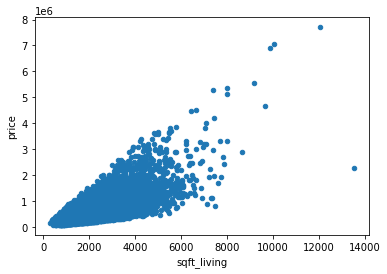

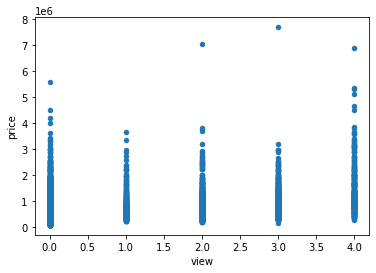

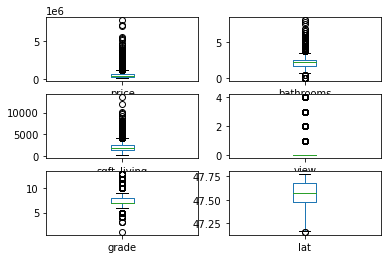

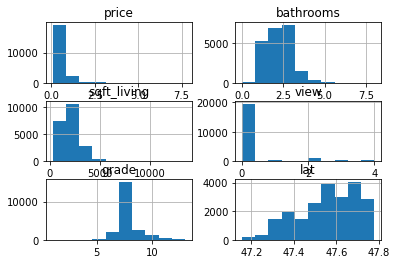

,price,bathrooms,sqft_living,view,grade,lat
0,221900.0,1.00,1180,0,7,47.5112
1,538000.0,2.25,2570,0,7,47.7210
2,180000.0,1.00,770,0,6,47.7379
3,604000.0,3.00,1960,0,7,47.5208
4,510000.0,2.00,1680,0,8,47.6168
...,...,...,...,...,...,...
21608,360000.0,2.50,1530,0,8,47.6993
21609,400000.0,2.50,2310,0,8,47.5107
21610,402101.0,0.75,1020,0,7,47.5944
21611,400000.0,2.50,1600,0,8,47.5345


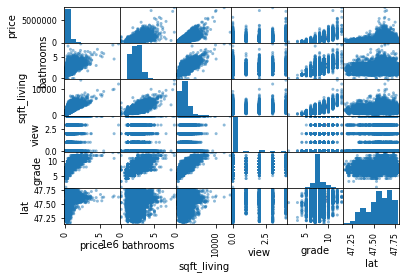

In [5]:
#House Data Analysis

house_data.plot.scatter(x = 'grade', y = 'price')
house_data.plot.scatter(x = 'bathrooms', y = 'price')
house_data.plot.scatter(x = 'lat', y = 'price')
house_data.plot.scatter(x = 'sqft_living', y = 'price')
house_data.plot.scatter(x = 'view', y = 'price')

house_data.plot(kind = 'box', subplots = 'true', layout = (3,2), sharex = False, sharey = False)
plt.show()

house_data.hist()
plt.show()

pd.plotting.scatter_matrix(house_data)
plt.show

house_data

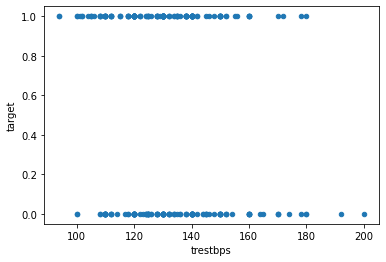

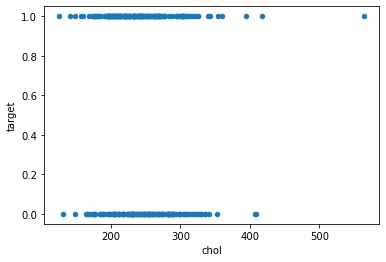

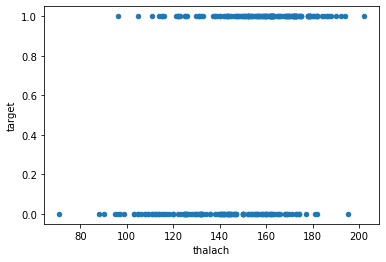

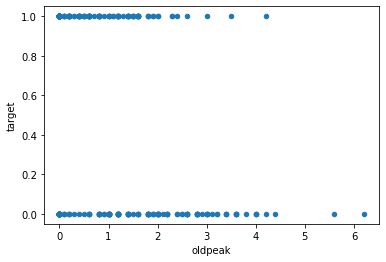

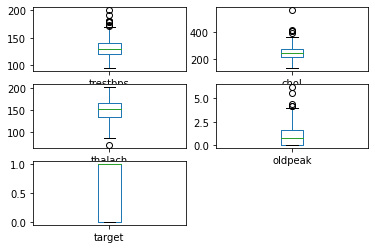

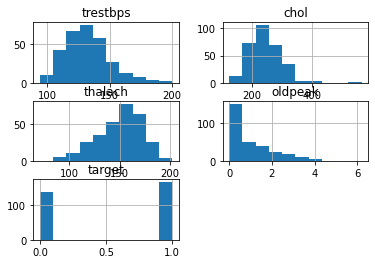

,trestbps,chol,thalach,oldpeak,target
0,145,233,150,2.3,1
1,130,250,187,3.5,1
2,130,204,172,1.4,1
3,120,236,178,0.8,1
4,120,354,163,0.6,1
...,...,...,...,...,...
298,140,241,123,0.2,0
299,110,264,132,1.2,0
300,144,193,141,3.4,0
301,130,131,115,1.2,0


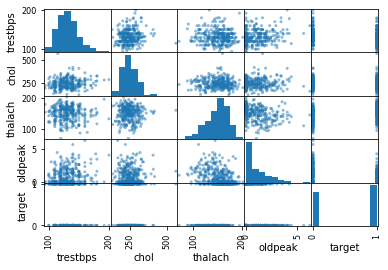

In [6]:
#Heart Data Analysis

heart_data.plot.scatter(x = 'trestbps', y = 'target')
heart_data.plot.scatter(x = 'chol', y = 'target')
heart_data.plot.scatter(x = 'thalach', y = 'target')
heart_data.plot.scatter(x = 'oldpeak', y = 'target')

heart_data.plot(kind = 'box', subplots = 'true', layout = (3,2), sharex = False, sharey = False)
plt.show()

heart_data.hist()
plt.show()

pd.plotting.scatter_matrix(heart_data)
plt.show

heart_data

In [7]:
#Linear Regression
data_mat = house_data.to_numpy()
y = data_mat[:,0]
m = y.size
iter_num = 2000 
standradized_mat, means, stds = standradization(data_mat)

Alpha = 1
Intial Theta: [0 0] ==> Optimal_theta: [540589.95513882 260724.85076105]
Intial Evalution Value: 418254249698.5147 ==> Final Evalution Value: 68025697475.232635


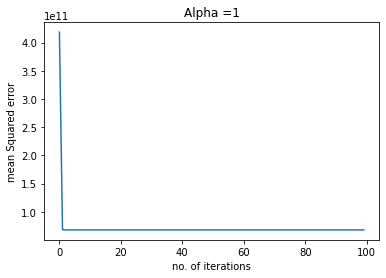

Evalution Values of Gradient Iterations:
[4.18254250e+11 6.85866360e+10 6.80268760e+10 ... 6.80256975e+10
 6.80256975e+10 6.80256975e+10]
Mean Square Error of theta on Test Sample:
69699588151.65163


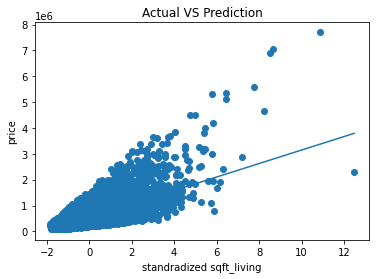

Alpha = 0.3
Intial Theta: [0 0] ==> Optimal_theta: [540589.95513882 260724.85076105]
Intial Evalution Value: 418254249698.5147 ==> Final Evalution Value: 68025697475.23265


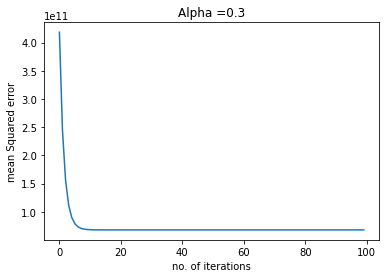

Evalution Values of Gradient Iterations:
[4.18254250e+11 2.43636117e+11 1.56134833e+11 ... 6.80256975e+10
 6.80256975e+10 6.80256975e+10]
Mean Square Error of theta on Test Sample:
69699588151.65163


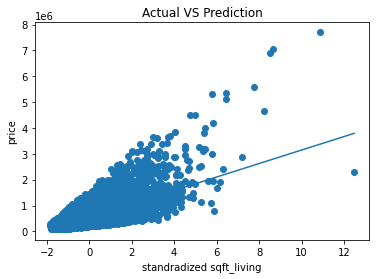

In [8]:
#univarient Linear Regression
intial_theta = np.array([0,0])
uni_x = np.insert(standradized_mat[:,2][:,np.newaxis],0, np.ones(m), axis = 1)
uni_x , test_x , y , test_y = train_test_split(uni_x,y)

###############################################################################################
alpha = 1# acceptable as fastest converger with acceptable cost
[optimal_theta, mean_square_errors] = gradient_descent(intial_theta, uni_x, y, alpha, iter_num)
#show output
debugging_visualiztion(100,alpha,intial_theta, optimal_theta, mean_square_errors)
accuracy(True, optimal_theta, test_x, test_y)
visualize_model('standradized sqft_living',1,uni_x, means[2], stds[2], optimal_theta)
###############################################################################################
###############################################################################################
alpha = 0.3 # acceptable converger with acceptable cost
[optimal_theta, mean_square_errors] = gradient_descent(intial_theta, uni_x, y, alpha, iter_num)
#show output
debugging_visualiztion(100,alpha,intial_theta, optimal_theta, mean_square_errors)
accuracy(True, optimal_theta, test_x, test_y)
visualize_model('standradized sqft_living',1,uni_x, means[2], stds[2], optimal_theta)
###############################################################################################

Alpha = 0.1
Intial Theta: [0 0] ==> Optimal_theta: [540589.95513882 260724.85076105]
Intial Evalution Value: 418254249698.5147 ==> Final Evalution Value: 68025697475.232635


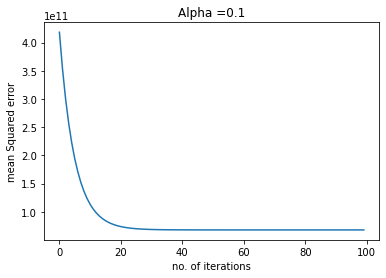

Evalution Values of Gradient Iterations:
[4.18254250e+11 3.53408410e+11 3.00579001e+11 ... 6.80256975e+10
 6.80256975e+10 6.80256975e+10]
Mean Square Error of theta on Test Sample:
69699588151.65163


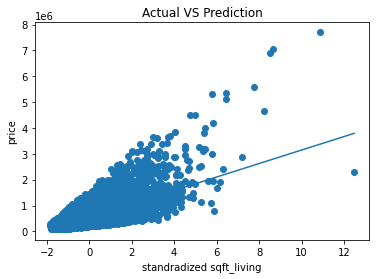

Alpha = 0.03
Intial Theta: [0 0] ==> Optimal_theta: [540589.95513882 260724.85076105]
Intial Evalution Value: 418254249698.5147 ==> Final Evalution Value: 68025697475.232635


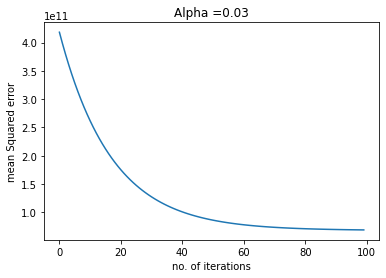

Evalution Values of Gradient Iterations:
[4.18254250e+11 3.98103319e+11 3.79112850e+11 ... 6.80256975e+10
 6.80256975e+10 6.80256975e+10]
Mean Square Error of theta on Test Sample:
69699588151.6516


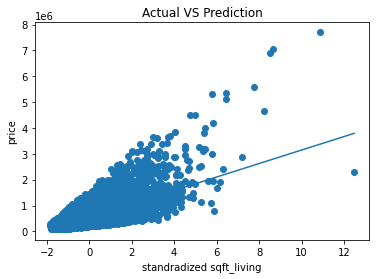

In [9]:
alpha = 0.1
[optimal_theta, mean_square_errors] = gradient_descent(intial_theta, uni_x, y, alpha, iter_num)
#show output
debugging_visualiztion(100,alpha,intial_theta, optimal_theta, mean_square_errors)
accuracy(True, optimal_theta, test_x, test_y)
visualize_model('standradized sqft_living',1,uni_x, means[2], stds[2], optimal_theta)

###############################################################################################
alpha = 0.03 # acceptable converger with most acccurate least cost
[optimal_theta, mean_square_errors] = gradient_descent(intial_theta, uni_x, y, alpha, iter_num)
#show output
debugging_visualiztion(100,alpha,intial_theta, optimal_theta, mean_square_errors)
accuracy(True, optimal_theta, test_x, test_y)
visualize_model('standradized sqft_living',1,uni_x, means[2], stds[2], optimal_theta)
###############################################################################################

Alpha = 0.01
Intial Theta: [0 0] ==> Optimal_theta: [540589.95352269 260724.84891402]
Intial Evalution Value: 418254249698.5147 ==> Final Evalution Value: 68025697475.232666


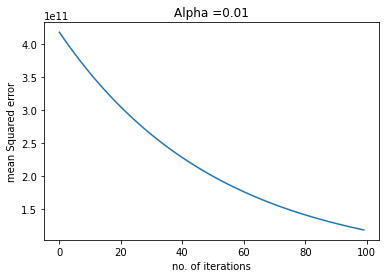

Evalution Values of Gradient Iterations:
[4.18254250e+11 4.11470875e+11 4.04819005e+11 ... 6.80256975e+10
 6.80256975e+10 6.80256975e+10]
Mean Square Error of theta on Test Sample:
69699588088.23552


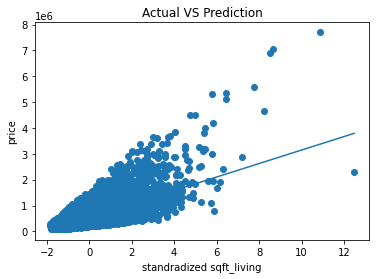

Alpha = 0.003
Intial Theta: [0 0] ==> Optimal_theta: [539122.10876828 259698.74975247]
Intial Evalution Value: 418254249698.5147 ==> Final Evalution Value: 68028788380.50577


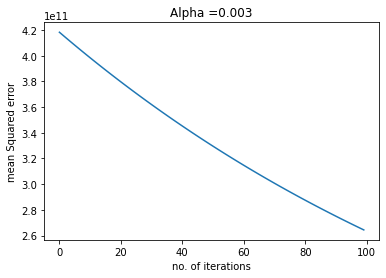

Evalution Values of Gradient Iterations:
[4.18254250e+11 4.16212265e+11 4.14182198e+11 ... 6.80288244e+10
 6.80288063e+10 6.80287884e+10]
Mean Square Error of theta on Test Sample:
69665171279.68037


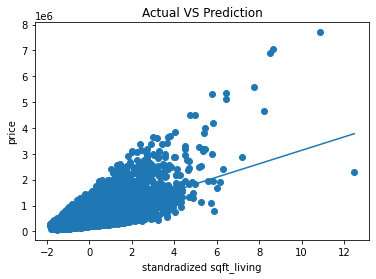

In [10]:
alpha = 0.01
[optimal_theta, mean_square_errors] = gradient_descent(intial_theta, uni_x, y, alpha, iter_num)
#show output
debugging_visualiztion(100,alpha,intial_theta, optimal_theta, mean_square_errors)
accuracy(True, optimal_theta, test_x, test_y)
visualize_model('standradized sqft_living',1,uni_x, means[2], stds[2], optimal_theta)

alpha = 0.003
[optimal_theta, mean_square_errors] = gradient_descent(intial_theta, uni_x, y, alpha, iter_num)
#show output
debugging_visualiztion(100,alpha,intial_theta, optimal_theta, mean_square_errors)
accuracy(True, optimal_theta, test_x, test_y)
visualize_model('standradized sqft_living',1,uni_x, means[2], stds[2], optimal_theta)

Alpha = 0.001
Intial Theta: [0 0] ==> Optimal_theta: [465334.13681239 218975.52701596]
Intial Evalution Value: 418254249698.5147 ==> Final Evalution Value: 75202670800.2031


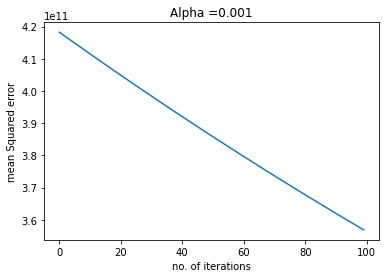

Evalution Values of Gradient Iterations:
[4.18254250e+11 4.17572924e+11 4.16892926e+11 ... 7.52305796e+10
 7.52166117e+10 7.52026708e+10]
Mean Square Error of theta on Test Sample:
76396069754.12846


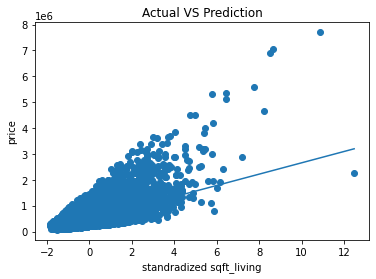

In [11]:
alpha = 0.001
[optimal_theta, mean_square_errors] = gradient_descent(intial_theta, uni_x, y, alpha, iter_num)
#show output
debugging_visualiztion(100,alpha,intial_theta, optimal_theta, mean_square_errors)
accuracy(True, optimal_theta, test_x, test_y)
visualize_model('standradized sqft_living',1,uni_x, means[2], stds[2], optimal_theta)

<ipython-input-2-8ae7e2b4fcf7>:62: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * gradient_direction(True,theta, x, y)


Alpha = 1
Intial Theta: [0 0 0 0 0 0] ==> Optimal_theta: [nan nan nan nan nan nan]
Intial Evalution Value: 418254249698.5147 ==> Final Evalution Value: nan


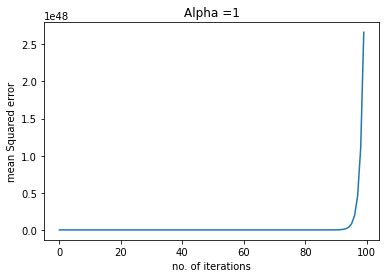

Evalution Values of Gradient Iterations:
[4.18254250e+11 1.73118615e+11 3.43752163e+11 ...            nan
            nan            nan]
Mean Square Error of theta on Test Sample:
nan


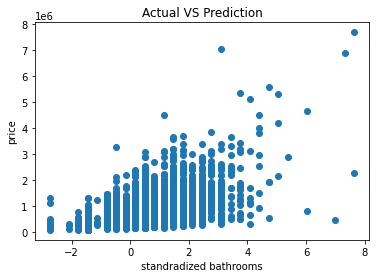

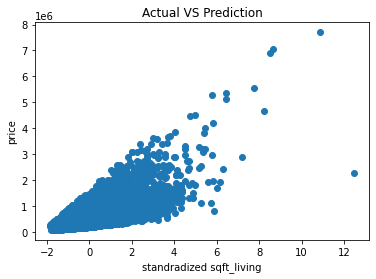

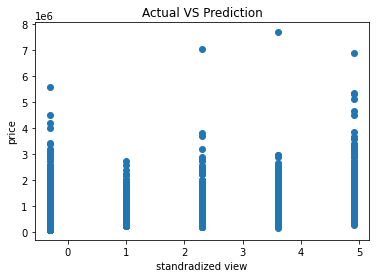

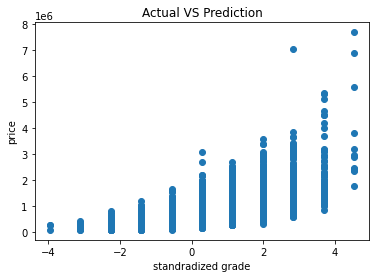

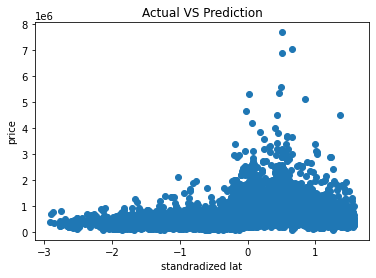

In [12]:
#multivarient Linear Regression
intial_theta = np.array([0,0,0,0,0,0])
multi_x = np.insert(standradized_mat[:,1:],0, np.ones(m), axis = 1)
multi_x , test_x , DuMuY  , dUmUy = train_test_split(multi_x,standradized_mat[:,0].copy())

###############################################################################################
alpha = 1 # Unacceptable at all as Large Alpha makes it diverage
[optimal_theta, mean_square_errors] = gradient_descent(intial_theta, multi_x, y, alpha, iter_num)
#show output
debugging_visualiztion(100,alpha,intial_theta, optimal_theta, mean_square_errors)
accuracy(True, optimal_theta, test_x, test_y)
visualize_model('standradized bathrooms',1,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized sqft_living',2,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized view',3,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized grade',4,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized lat',5,multi_x, means[2], stds[2], optimal_theta)

Alpha = 0.3
Intial Theta: [0 0 0 0 0 0] ==> Optimal_theta: [541097.09646787 -17187.89311935 172448.55673679  75099.92846188
  93530.95653136  90584.42861567]
Intial Evalution Value: 418254249698.5147 ==> Final Evalution Value: 49374251539.46531


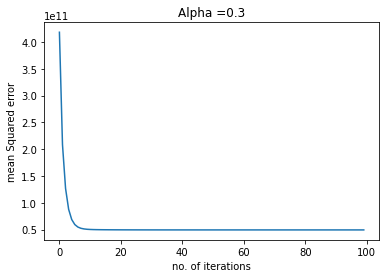

Evalution Values of Gradient Iterations:
[4.18254250e+11 2.08451033e+11 1.26690219e+11 ... 4.93742515e+10
 4.93742515e+10 4.93742515e+10]
Mean Square Error of theta on Test Sample:
47360258300.627365


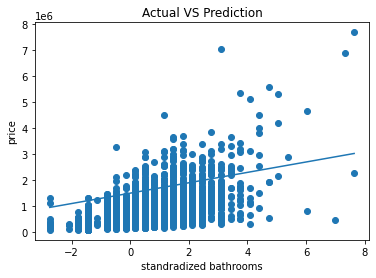

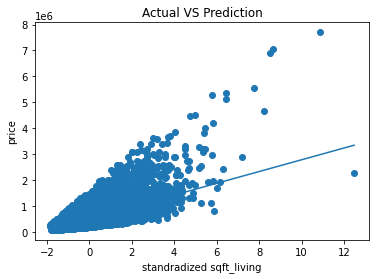

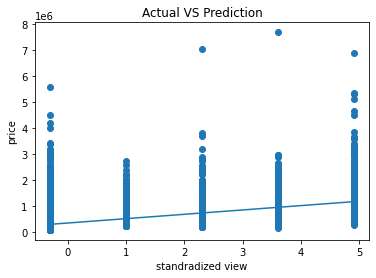

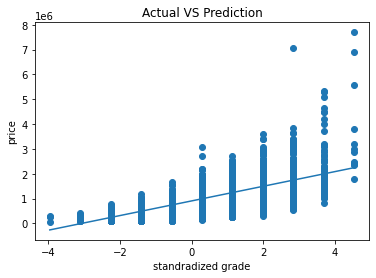

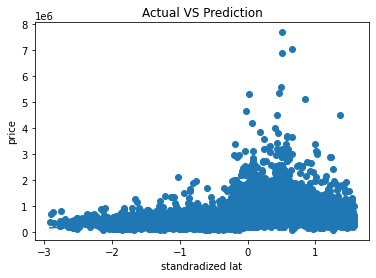

In [13]:
###############################################################################################
alpha = 0.3 # Best as Fastest Converger with most accurate least cost
[optimal_theta, mean_square_errors] = gradient_descent(intial_theta, multi_x, y, alpha, iter_num)
#show output
debugging_visualiztion(100,alpha,intial_theta, optimal_theta, mean_square_errors)
accuracy(True, optimal_theta, test_x, test_y)
visualize_model('standradized bathrooms',1,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized sqft_living',2,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized view',3,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized grade',4,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized lat',5,multi_x, means[2], stds[2], optimal_theta)
###############################################################################################

Alpha = 0.1
Intial Theta: [0 0 0 0 0 0] ==> Optimal_theta: [541097.09646787 -17187.89311935 172448.55673679  75099.92846188
  93530.95653136  90584.42861567]
Intial Evalution Value: 418254249698.5147 ==> Final Evalution Value: 49374251539.46531


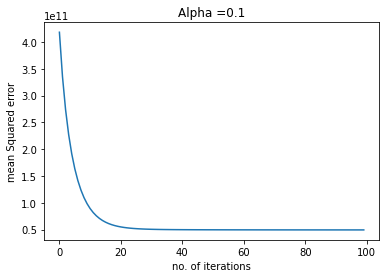

Evalution Values of Gradient Iterations:
[4.18254250e+11 3.35342461e+11 2.73981998e+11 ... 4.93742515e+10
 4.93742515e+10 4.93742515e+10]
Mean Square Error of theta on Test Sample:
47360258300.62737


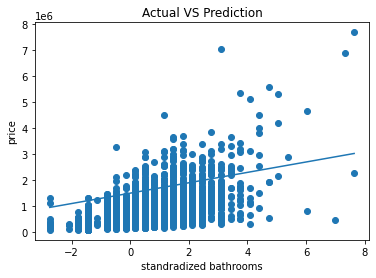

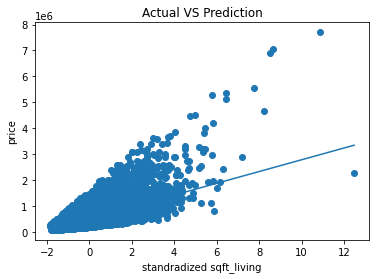

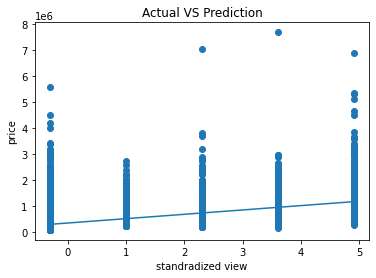

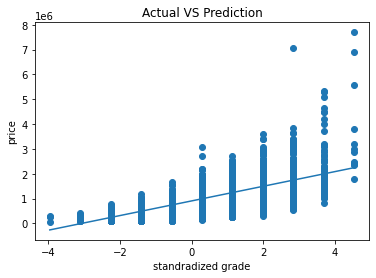

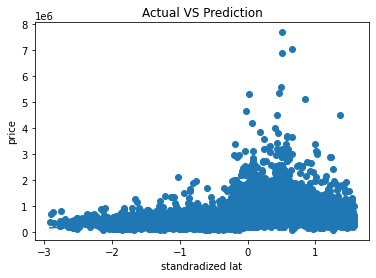

In [14]:
###############################################################################################
alpha = 0.1 # Acceptable Converger with most accurate least cost
[optimal_theta, mean_square_errors] = gradient_descent(intial_theta, multi_x, y, alpha, iter_num)
#show output
debugging_visualiztion(100,alpha,intial_theta, optimal_theta, mean_square_errors)
accuracy(True, optimal_theta, test_x, test_y)
visualize_model('standradized bathrooms',1,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized sqft_living',2,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized view',3,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized grade',4,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized lat',5,multi_x, means[2], stds[2], optimal_theta)
###############################################################################################

Alpha = 0.03
Intial Theta: [0 0 0 0 0 0] ==> Optimal_theta: [541097.12467311 -17187.53511912 172447.84823366  75099.9755352
  93531.32037439  90584.42043263]
Intial Evalution Value: 418254249698.5147 ==> Final Evalution Value: 49374251539.61174


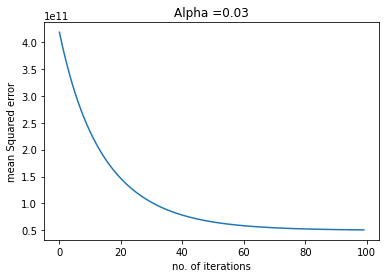

Evalution Values of Gradient Iterations:
[4.18254250e+11 3.92018088e+11 3.67994292e+11 ... 4.93742515e+10
 4.93742515e+10 4.93742515e+10]
Mean Square Error of theta on Test Sample:
47360251265.07124


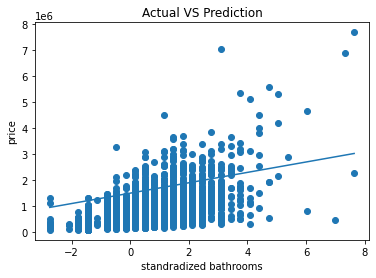

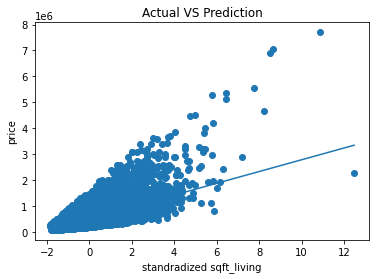

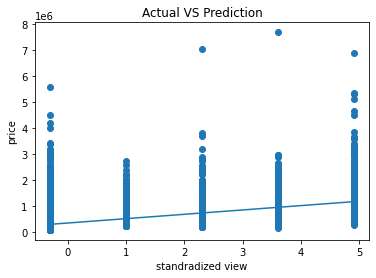

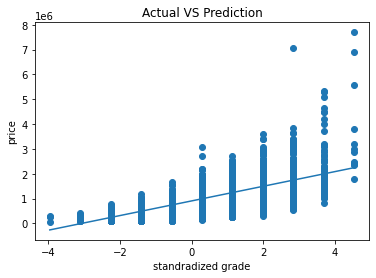

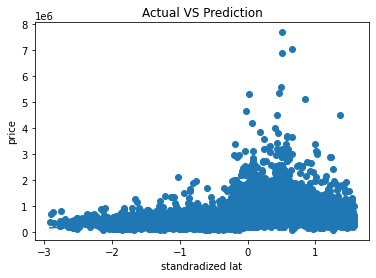

In [15]:
alpha = 0.03
[optimal_theta, mean_square_errors] = gradient_descent(intial_theta, multi_x, y, alpha, iter_num)
#show output
debugging_visualiztion(100,alpha,intial_theta, optimal_theta, mean_square_errors)
accuracy(True, optimal_theta, test_x, test_y)
visualize_model('standradized bathrooms',1,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized sqft_living',2,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized view',3,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized grade',4,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized lat',5,multi_x, means[2], stds[2], optimal_theta)

Alpha = 0.01
Intial Theta: [0 0 0 0 0 0] ==> Optimal_theta: [541159.2405834  -16351.45635148 170914.4042514   75208.12247359
  94255.49131711  90574.84522836]
Intial Evalution Value: 418254249698.5147 ==> Final Evalution Value: 49374939962.07428


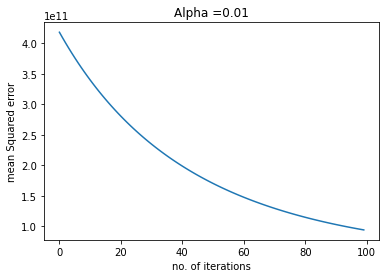

Evalution Values of Gradient Iterations:
[4.18254250e+11 4.09379089e+11 4.00758849e+11 ... 4.93749453e+10
 4.93749426e+10 4.93749400e+10]
Mean Square Error of theta on Test Sample:
47346348927.28714


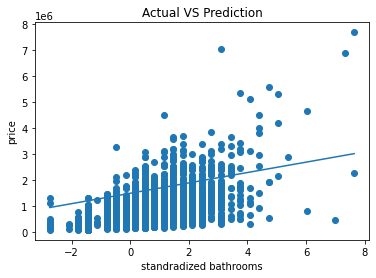

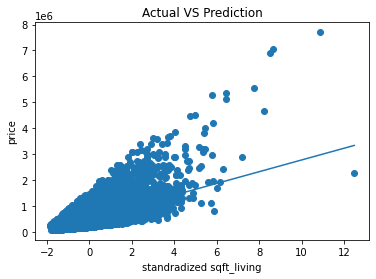

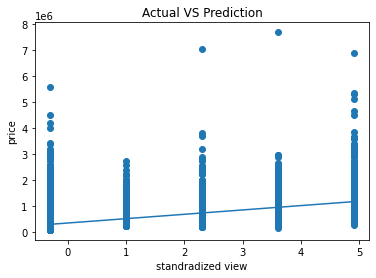

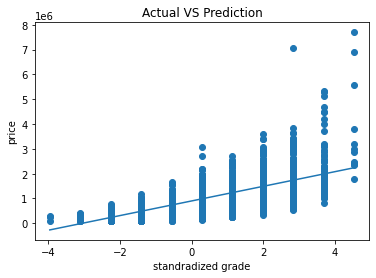

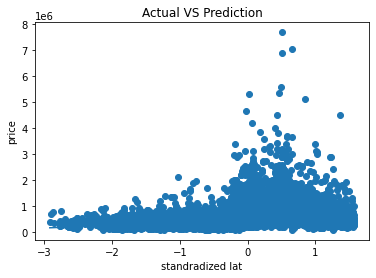

In [16]:
alpha = 0.01
[optimal_theta, mean_square_errors] = gradient_descent(intial_theta, multi_x, y, alpha, iter_num)
#show output
debugging_visualiztion(100,alpha,intial_theta, optimal_theta, mean_square_errors)
accuracy(True, optimal_theta, test_x, test_y)
visualize_model('standradized bathrooms',1,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized sqft_living',2,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized view',3,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized grade',4,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized lat',5,multi_x, means[2], stds[2], optimal_theta)

Alpha = 0.003
Intial Theta: [0 0 0 0 0 0] ==> Optimal_theta: [ 5.40714493e+05 -2.84540311e+01  1.49894388e+05  7.73531573e+04
  9.89638039e+04  9.09617876e+04]
Intial Evalution Value: 418254249698.5147 ==> Final Evalution Value: 49545663656.201645


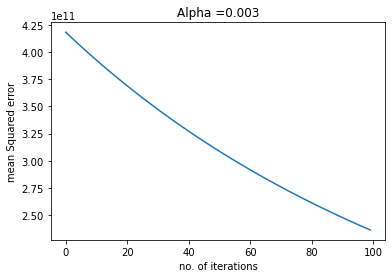

Evalution Values of Gradient Iterations:
[4.18254250e+11 4.15578075e+11 4.12925134e+11 ... 4.95461138e+10
 4.95458886e+10 4.95456637e+10]
Mean Square Error of theta on Test Sample:
47388410609.16522


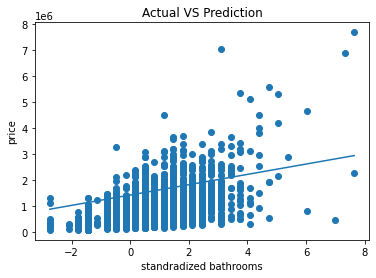

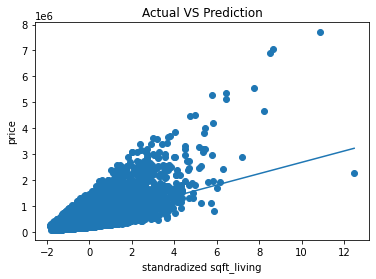

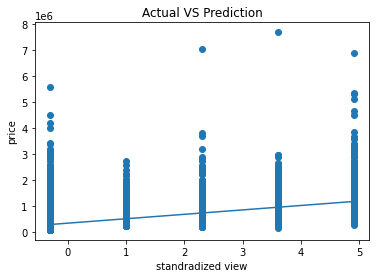

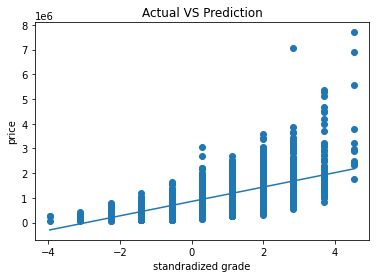

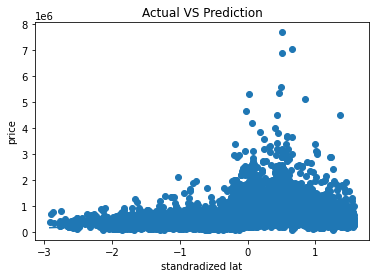

In [17]:
alpha = 0.003
[optimal_theta, mean_square_errors] = gradient_descent(intial_theta, multi_x, y, alpha, iter_num)
#show output
debugging_visualiztion(100,alpha,intial_theta, optimal_theta, mean_square_errors)
accuracy(True, optimal_theta, test_x, test_y)
visualize_model('standradized bathrooms',1,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized sqft_living',2,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized view',3,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized grade',4,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized lat',5,multi_x, means[2], stds[2], optimal_theta)

Alpha = 0.001
Intial Theta: [0 0 0 0 0 0] ==> Optimal_theta: [468796.8988454   29254.18068856 120136.28778461  78276.59712553
  93917.62276869  82402.55204338]
Intial Evalution Value: 418254249698.5147 ==> Final Evalution Value: 56066425546.64254


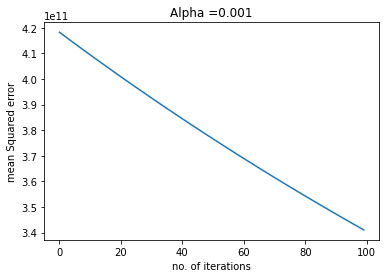

Evalution Values of Gradient Iterations:
[4.18254250e+11 4.17360894e+11 4.16470129e+11 ... 5.60902606e+10
 5.60783315e+10 5.60664255e+10]
Mean Square Error of theta on Test Sample:
52373426961.995514


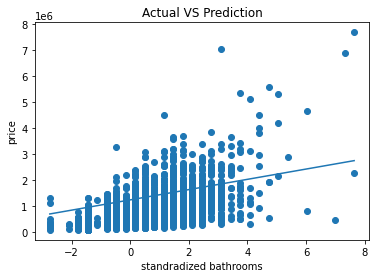

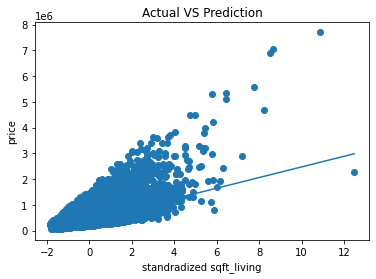

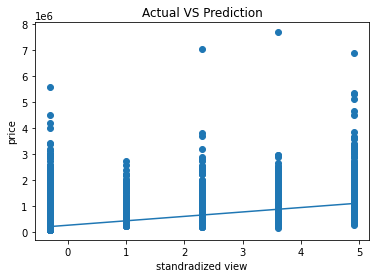

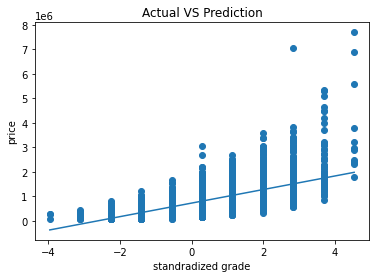

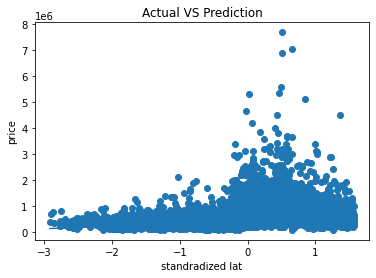

In [18]:
alpha = 0.001
[optimal_theta, mean_square_errors] = gradient_descent(intial_theta, multi_x, y, alpha, iter_num)
#show output
debugging_visualiztion(100,alpha,intial_theta, optimal_theta, mean_square_errors)
accuracy(True, optimal_theta, test_x, test_y)
visualize_model('standradized bathrooms',1,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized sqft_living',2,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized view',3,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized grade',4,multi_x, means[2], stds[2], optimal_theta)
visualize_model('standradized lat',5,multi_x, means[2], stds[2], optimal_theta)

In [19]:
#Logistic Regression
data_mat = heart_data.to_numpy()
y = data_mat[:,-1]
iter_num = 2000
[standradized_mat, means, stds] = standradization(data_mat)

Alpha = 1
Intial Theta: [0 0 0 0] ==> Optimal_theta: [ 0.24729905 -0.34312318 -0.26322142  0.9617884 ]
Intial Evalution Value: 1.4149498560666738e-73 ==> Final Evalution Value: 5.510181429716736e-61


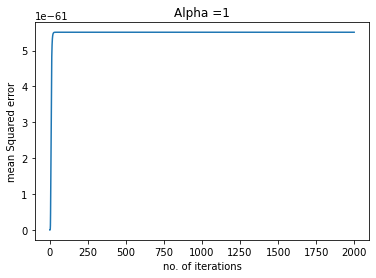

Evalution Values of Gradient Iterations:
[1.41494986e-73 4.66621274e-68 3.62640470e-65 ... 5.51018143e-61
 5.51018143e-61 5.51018143e-61]
Likelihood Estimation of theta on Test Sample:
3.9273403012709877e-17
Correct Predictions % of theta on Test Sample:
68.85245901639344%


In [20]:
#multivarient Logistic Regression
intial_theta = np.array([0,0,0,0])
multi_x = np.insert(standradized_mat[:,:3],0, np.ones(y.size), axis = 1)
multi_x , test_x , y , test_y = terminals_train_test_split(multi_x,y)
alpha = 1
[optimal_theta, likelihood_estimations] = gradient_ascent(intial_theta, multi_x, y, alpha, iter_num)
#show output
debugging_visualiztion(2000,alpha,intial_theta, optimal_theta, likelihood_estimations)
accuracy(False, optimal_theta, test_x, test_y)

Alpha = 0.3
Intial Theta: [0 0 0 0] ==> Optimal_theta: [ 0.24729905 -0.34312318 -0.26322142  0.9617884 ]
Intial Evalution Value: 1.4149498560666738e-73 ==> Final Evalution Value: 5.5101814297167316e-61


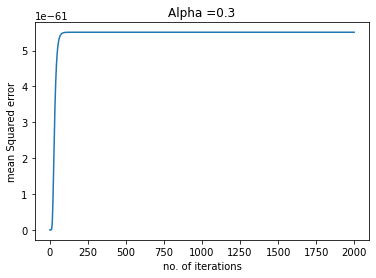

Evalution Values of Gradient Iterations:
[1.41494986e-73 9.91296470e-72 3.47736152e-70 ... 5.51018143e-61
 5.51018143e-61 5.51018143e-61]
Likelihood Estimation of theta on Test Sample:
3.9273403012709877e-17
Correct Predictions % of theta on Test Sample:
68.85245901639344%


In [21]:
alpha = 0.3
[optimal_theta, likelihood_estimations] = gradient_ascent(intial_theta, multi_x, y, alpha, iter_num)
#show output
debugging_visualiztion(2000,alpha,intial_theta, optimal_theta, likelihood_estimations)
accuracy(False, optimal_theta, test_x, test_y)

Alpha = 0.1
Intial Theta: [0 0 0 0] ==> Optimal_theta: [ 0.24729905 -0.34312318 -0.26322142  0.9617884 ]
Intial Evalution Value: 1.4149498560666738e-73 ==> Final Evalution Value: 5.510181429716712e-61


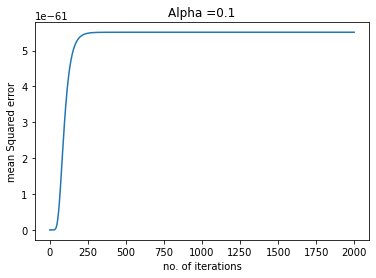

Evalution Values of Gradient Iterations:
[1.41494986e-73 6.08345260e-73 2.41028295e-72 ... 5.51018143e-61
 5.51018143e-61 5.51018143e-61]
Likelihood Estimation of theta on Test Sample:
3.9273403012709396e-17
Correct Predictions % of theta on Test Sample:
68.85245901639344%


In [22]:
alpha = 0.1
[optimal_theta, likelihood_estimations] = gradient_ascent(intial_theta, multi_x, y, alpha, iter_num)
#show output
debugging_visualiztion(2000,alpha,intial_theta, optimal_theta, likelihood_estimations)
accuracy(False, optimal_theta, test_x, test_y)

Alpha = 0.03
Intial Theta: [0 0 0 0] ==> Optimal_theta: [ 0.24728403 -0.34311642 -0.26319809  0.96170214]
Intial Evalution Value: 1.4149498560666738e-73 ==> Final Evalution Value: 5.5101806109970026e-61


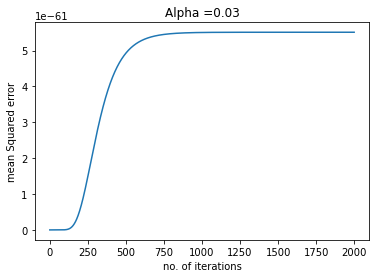

Evalution Values of Gradient Iterations:
[1.41494986e-73 2.20131460e-73 3.39908967e-73 ... 5.51018060e-61
 5.51018060e-61 5.51018061e-61]
Likelihood Estimation of theta on Test Sample:
3.9271955836883054e-17
Correct Predictions % of theta on Test Sample:
68.85245901639344%


In [23]:
alpha = 0.03
[optimal_theta, likelihood_estimations] = gradient_ascent(intial_theta, multi_x, y, alpha, iter_num)
#show output
debugging_visualiztion(2000,alpha,intial_theta, optimal_theta, likelihood_estimations)
accuracy(False, optimal_theta, test_x, test_y)

Alpha = 0.01
Intial Theta: [0 0 0 0] ==> Optimal_theta: [ 0.24046329 -0.33744542 -0.25555357  0.92744235]
Intial Evalution Value: 1.4149498560666738e-73 ==> Final Evalution Value: 5.379278901544781e-61


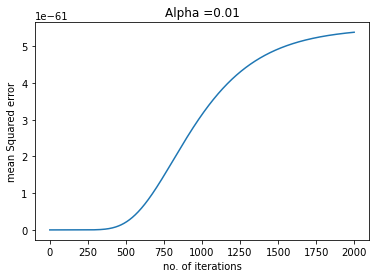

Evalution Values of Gradient Iterations:
[1.41494986e-73 1.64022761e-73 1.89977778e-73 ... 5.37848670e-61
 5.37888340e-61 5.37927890e-61]
Likelihood Estimation of theta on Test Sample:
3.865783888188712e-17
Correct Predictions % of theta on Test Sample:
68.85245901639344%


In [24]:
alpha = 0.01
[optimal_theta, likelihood_estimations] = gradient_ascent(intial_theta, multi_x, y, alpha, iter_num)
#show output
debugging_visualiztion(2000,alpha,intial_theta, optimal_theta, likelihood_estimations)
accuracy(False, optimal_theta, test_x, test_y)

Alpha = 0.003
Intial Theta: [0 0 0 0] ==> Optimal_theta: [ 0.1723989  -0.26277505 -0.19290443  0.65314457]
Intial Evalution Value: 1.4149498560666738e-73 ==> Final Evalution Value: 5.791708238749661e-62


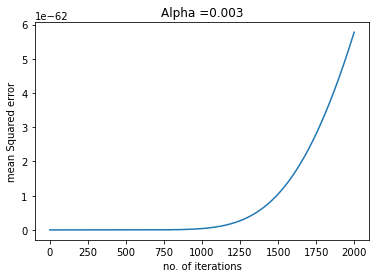

Evalution Values of Gradient Iterations:
[1.41494986e-73 1.47913957e-73 1.54612428e-73 ... 5.76311819e-62
 5.77740410e-62 5.79170824e-62]
Likelihood Estimation of theta on Test Sample:
2.6803955182550806e-17
Correct Predictions % of theta on Test Sample:
70.49180327868852%


In [25]:
alpha = 0.003
[optimal_theta, likelihood_estimations] = gradient_ascent(intial_theta, multi_x, y, alpha, iter_num)
#show output
debugging_visualiztion(2000,alpha,intial_theta, optimal_theta, likelihood_estimations)
accuracy(False, optimal_theta, test_x, test_y)

Alpha = 0.001
Intial Theta: [0 0 0 0] ==> Optimal_theta: [ 0.08494616 -0.14165101 -0.10343809  0.32534561]
Intial Evalution Value: 1.4149498560666738e-73 ==> Final Evalution Value: 7.910490198278585e-66


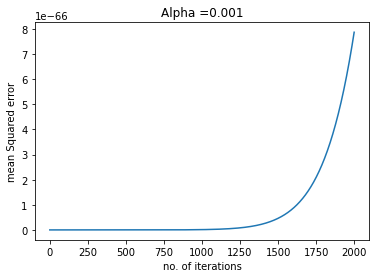

Evalution Values of Gradient Iterations:
[1.41494986e-73 1.43603683e-73 1.45742580e-73 ... 7.83224732e-66
 7.87128156e-66 7.91049020e-66]
Likelihood Estimation of theta on Test Sample:
6.831033520322467e-18
Correct Predictions % of theta on Test Sample:
72.1311475409836%


In [26]:
alpha = 0.001
[optimal_theta, likelihood_estimations] = gradient_ascent(intial_theta, multi_x, y, alpha, iter_num)
#show output
debugging_visualiztion(2000,alpha,intial_theta, optimal_theta, likelihood_estimations)
accuracy(False, optimal_theta, test_x, test_y)